# About
- **By**: Tsombou Christian
- **@** : tsombouchris@gmail.com
- **linkedIn**: https://www.linkedin.com/in/tsombouchris/

This Notebook performs an EDA on Demand and Supply of Energy in Tamil Nadu in India from July 2014 to May 2022

- **Data Source**: [POSOCO website](https://posoco.in/reports/monthly-reports/)
- **Data scrapped by**: Tsombou Christian (Github repo for the webscrapping notebook)
- **Data unit**: Demand and Supply of Energy is in MU - Million Unit (unit of energy) or in MW Mega-Watt
- **Reference**: 

NB: This Notebook was produced within the context of The Omdena [Chennai Chapter project on Electricity Power Outage Analysis](https://github.com/OmdenaAI/chennai-india-power-outage)

# Summary

The dataset we loaded into this notebook was not dirty per say but need some improvement in the granularity of the data, after that step we proceded with EDA mostly vizualization

The initial dataset had 130 entries and 16 columns; after cleaning we obtained a 130 entries by 18s columns dataframe.

#### Data cleaning

_The main cleaning actions on the dataset were:_
 - Extract the Year corresponding to the data presented
 - Extract the Month corresponding to the data presented
 - replace months in words by months in figures
 - Convert the date_report column to datetime and create columns for month and year of publication
 - Checking for duplicates on all columns and drop them
 - Searching for duplicates on the basis of month and year columns(during scrapping there were months with more than one report)
 - drop report published more than once
 - Aggregate demand and supply by year
 
 
#### Results(EDA)

EDA was performed on the following columns:
* Requirement(MW);
* Peak_Demand_Met5(MW)
* Surplus(+)/Deficit(-)(MW)
* %Shortage(MW)

Columns used as time index sor the EDA:

* time index for yearly data: 'year'
* time index for monthly data: 'year', 'month'

_we observed that:_

- there is no year where the supply in MW was up to or more than the demand
- 2012 with 12.67% is the year having the biggest deficit
- 2019 with 0.06% corresponds to the year with the smallest deficit
- The maximum and minimum Energy supplied in the period were respectively 184835 MW in 2021 and 92862 MW in 2012
- The demand trend is always above the supply trend during the period
- Percentage of shortages in MW trend : The shortages are reducing as we move from 2012 to 2021

- The supply of energy was enough 45% of the time(56 months out of 122 months) during the period of study)
- In 2012 and 2013 the supply of energy was lower than the demand for each month of the year
- The level of monthly highest deficit rate is reducing with time and is contantly less than 1% since end of 2015. April, May, June and July are the most represented
- What are the maximum and minimum Energy supplied in the period and when was that? (Ans: max supplied: 17563 MW in april 2022, min supplied: 8518 MW in november 2012)
- demand and supply trends (Obs: The difference between demand and supply per month is getting smaller with time enven if in general demand is above supply)
- percentage of shortages in MW - trend (Obs: The shortages rate per month are reducing to zero as we move from 2012 to 2022)

# 1. Data Cleaning

In [1]:
#   import the necessary libraries for EDA
import pandas as pd
import numpy as np
import seaborn as sns ; sns.set(font_scale=1)
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import datetime as dt
import re
%matplotlib inline


In [2]:
#   read the energy demand and supply dataset
energy_ds = pd.read_csv('POSOCO_DEMAND_SUPPLY_TamilNadu.csv')

In [3]:
# Visualize the first row of the dataset
energy_ds.head()

,state,Requirement(MU/DAY),Energy_met(MU/DAY),Surplus(+)/Deficit(-)(MU/DAY),Requirement(MU),Energy_met(MU),Surplus(+)/Deficit(-)(MU),%Shortage(MU),Requirement(MW),Peak_Demand_Met5(MW),Surplus(+)/Deficit(-)(MW),%Shortage(MW),date_report,name_report
0,Tamil Nadu,354.0,354.0,-0.9,10632.0,10605.0,-26.0,-0.2,17646.0,17563.0,-83.0,-0.5,23-05-2022,Monthly_Report_Apr_2022
1,Tamil Nadu,337.0,337.0,0.0,10459.0,10458.0,-1.0,0.0,16906.0,16906.0,0.0,0.0,23-06-2022,Monthly_Report_May_2022
2,Tamil Nadu,344.0,343.0,-0.3,10657.0,10648.0,-9.0,-0.1,17196.0,17196.0,0.0,0.0,25-04-2022,Monthly_Report_Mar_2022
3,Tamil Nadu,286.0,286.0,0.0,8873.0,8873.0,1.0,0.0,15290.0,15290.0,0.0,0.0,23-02-2022,Monthly_Report_Jan_2022
4,Tamil Nadu,245.0,245.0,0.0,7362.0,7360.0,-1.0,0.0,13501.0,13480.0,-21.0,-0.2,23-12-2021,Monthly_Report_Nov_2021


In [4]:
def extract_month (x):
    month_ = re.split(r'_| ', x)[2]
    if month_.lower() == 'monthly':
        month = re.split(r'_| ', x)[0]
    else:
        month = month_
    return month    

def extract_year (x):
    year_ = re.split(r"[_. ]", x.strip())[3]
    if year_.lower() == 'report':
        year = re.split(r"[_. ]", x.strip())[1]
    else:
        year = year_
    return year

# Extract the Year corresponding to the data presented
energy_ds['year'] = energy_ds['name_report'].apply(extract_year)
#energy_ds['year'].astype(int)

# Extract the Month corresponding to the data presented
energy_ds['month'] = energy_ds['name_report'].apply(extract_month)
#energy_ds['month'].astype(int)


In [5]:
# verify that the month and year were well extracted
print(energy_ds['month'].unique())
print(energy_ds['year'].unique())

['Apr' 'May' 'Mar' 'Jan' 'Nov' 'Sep' 'Jul' 'Feb' 'Dec' 'Oct' 'Aug' 'Jun'
 'April' 'March' 'January' 'November' 'September' 'July' 'February'
 'December' 'October' 'August' 'June']
['2022' '2021' '2020' '2019' '2018' '2017' '2016' '2015' '2014' '2013'
 '2012']


In [6]:
# replace months in words by months in figures
to_replace_dic = {'Apr':4, 'May':5, 'Mar':3, 'Jan':1, 'Nov':11, 'Sep':9, 'Jul':7, 'Feb':2, 'Dec':12, 'Oct':10, 'Aug':8, 'Jun':6, 'April':4, 'March':3, 'January':1, 'November':11,
       'September':9, 'July':7, 'February':2, 'December':12, 'October':10, 'August':8, 'June':6}

energy_ds['month'].replace(to_replace=to_replace_dic , inplace=True)

energy_ds['year'] = energy_ds['year'].astype(int)

In [7]:
# info on the dataset
energy_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          130 non-null    object 
 1   Requirement(MU/DAY)            130 non-null    float64
 2   Energy_met(MU/DAY)             130 non-null    float64
 3   Surplus(+)/Deficit(-)(MU/DAY)  130 non-null    float64
 4   Requirement(MU)                130 non-null    float64
 5   Energy_met(MU)                 130 non-null    float64
 6   Surplus(+)/Deficit(-)(MU)      130 non-null    float64
 7   %Shortage(MU)                  130 non-null    float64
 8   Requirement(MW)                130 non-null    float64
 9   Peak_Demand_Met5(MW)           130 non-null    float64
 10  Surplus(+)/Deficit(-)(MW)      130 non-null    float64
 11  %Shortage(MW)                  130 non-null    float64
 12  date_report                    130 non-null    obj

In [8]:
# Convert the date_report column to datetime and create columns for month and year of publication

#convert date_report to datetime
energy_ds['date_published'] = pd.to_datetime(energy_ds['date_report'])

#Extract month  from date column.
energy_ds['month_published'] = energy_ds['date_published'].dt.month

#Extract year from date column.
energy_ds['year_published'] = energy_ds['date_published'].dt.year

# drop date_report columm
energy_ds.drop(columns='date_report', axis=1, inplace=True)


In [9]:
# convert columns 1 to 11 to float 
# print(energy_ds.columns)
# numeric_columns = energy_ds.columns[1:12]
# print(numeric_columns)
# energy_ds[numeric_columns] = energy_ds[numeric_columns].astype(float)

In [10]:
# info on the dataset
energy_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   state                          130 non-null    object        
 1   Requirement(MU/DAY)            130 non-null    float64       
 2   Energy_met(MU/DAY)             130 non-null    float64       
 3   Surplus(+)/Deficit(-)(MU/DAY)  130 non-null    float64       
 4   Requirement(MU)                130 non-null    float64       
 5   Energy_met(MU)                 130 non-null    float64       
 6   Surplus(+)/Deficit(-)(MU)      130 non-null    float64       
 7   %Shortage(MU)                  130 non-null    float64       
 8   Requirement(MW)                130 non-null    float64       
 9   Peak_Demand_Met5(MW)           130 non-null    float64       
 10  Surplus(+)/Deficit(-)(MW)      130 non-null    float64       
 11  %Shortage(MW)      

We observe that there is no null value in our dataset

In [11]:
# Checking for duplicates on all columns and outputting them
duplicates = energy_ds.duplicated(subset=energy_ds.columns, keep=False)
energy_ds[duplicates]

,state,Requirement(MU/DAY),Energy_met(MU/DAY),Surplus(+)/Deficit(-)(MU/DAY),Requirement(MU),Energy_met(MU),Surplus(+)/Deficit(-)(MU),%Shortage(MU),Requirement(MW),Peak_Demand_Met5(MW),Surplus(+)/Deficit(-)(MW),%Shortage(MW),name_report,year,month,date_published,month_published,year_published
26,Tamil Nadu,309.0,309.0,0.1,9583.0,9586.0,3.0,0.0,15591.0,15591.0,0.0,0.0,Monthly_Report_Mar_2020,2020,3,2020-04-23,4,2020
33,Tamil Nadu,309.0,309.0,0.1,9583.0,9586.0,3.0,0.0,15591.0,15591.0,0.0,0.0,Monthly_Report_Mar_2020,2020,3,2020-04-23,4,2020
50,Tamil Nadu,295.1,294.9,-0.2,8263.1,8257.0,-6.1,-0.1,14685.0,14681.0,-4.0,0.0,Monthly Report February 2018,2018,2,2018-03-23,3,2018
51,Tamil Nadu,295.1,294.9,-0.2,8263.1,8257.0,-6.1,-0.1,14685.0,14681.0,-4.0,0.0,Monthly Report February 2018,2018,2,2018-03-23,3,2018
113,TNEB,257.0,235.0,-23.0,7981.0,7272.0,-709.0,-9.0,11863.0,11105.0,-758.0,-6.0,July 2012 Monthly Report,2012,7,2014-07-21,7,2014
122,TNEB,257.0,235.0,-23.0,7981.0,7272.0,-709.0,-9.0,11863.0,11105.0,-758.0,-6.0,July 2012 Monthly Report,2012,7,2014-07-21,7,2014


In [12]:
# Dropping complete duplicates
energy_ds.drop_duplicates(inplace=True)

In [13]:
#Searching for duplicates on the basis of month and year columns(during scrapping there were months with more than one report)
duplicates_month_year = energy_ds.duplicated(subset=['month', 'year'], keep=False)
energy_ds[duplicates_month_year]


,state,Requirement(MU/DAY),Energy_met(MU/DAY),Surplus(+)/Deficit(-)(MU/DAY),Requirement(MU),Energy_met(MU),Surplus(+)/Deficit(-)(MU),%Shortage(MU),Requirement(MW),Peak_Demand_Met5(MW),Surplus(+)/Deficit(-)(MW),%Shortage(MW),name_report,year,month,date_published,month_published,year_published
69,TNEB,275.3,275.2,-0.1,8535.4,8531.1,-4.2,0.0,13757.0,13658.0,-99.0,-0.7,Monthly Report August 2015_R1,2015,8,2017-01-18,1,2017
71,TNEB,275.3,275.2,-0.1,8535.4,8531.1,-4.2,0.0,13757.0,13658.0,-99.0,-0.7,Monthly Report August 2015,2015,8,2016-07-13,7,2016
94,TNEB,279.0,264.0,-15.0,8640.0,8190.0,-450.0,-5.2,12969.0,12650.0,-319.0,-2.5,Monthly Report March 2014,2014,3,2014-07-21,7,2014
95,TNEB,266.0,254.0,-12.0,7446.0,7116.0,-330.0,-4.4,12581.0,12037.0,-544.0,-4.3,Monthly Report February 2014,2014,2,2014-07-21,7,2014
96,TNEB,252.0,247.0,-6.0,7821.0,7645.0,-176.0,-2.3,13475.0,12799.0,-676.0,-5.0,Monthly Report January 2014,2014,1,2014-07-21,7,2014
97,TNEB,266.0,254.0,-12.0,7446.0,7116.0,-330.0,-4.4,12581.0,12037.0,-544.0,-4.3,Monthly Report February 2014,2014,2,2014-03-21,3,2014
98,TNEB,252.0,247.0,-6.0,7821.0,7645.0,-176.0,-2.3,13475.0,12799.0,-676.0,-5.0,Monthly Report January 2014,2014,1,2014-02-21,2,2014
102,TNEB,279.0,264.0,-15.0,8640.0,8190.0,-450.0,-5.2,12969.0,12650.0,-319.0,-2.5,Monthly Report March 2014_R1,2014,3,2015-06-15,6,2015
103,TNEB,279.0,264.0,-15.0,8640.0,8190.0,-450.0,-5.2,12969.0,12650.0,-319.0,-2.5,Monthly Report March 2014,2014,3,2014-04-24,4,2014


In [14]:
# drop report published more than once
energy_ds.drop_duplicates( subset=['month', 'year'],inplace=True)
energy_ds.drop(columns=['state'], axis=1, inplace=True)
energy_ds.to_csv('demand_supply_monthly.csv', index=False)


In [15]:
# Aggregate demand and supply by year
agg_column = ['year']
summaries = {'Requirement(MU/DAY)':'mean', 'Energy_met(MU/DAY)':'mean',
       'Surplus(+)/Deficit(-)(MU/DAY)':'mean', 'Requirement(MU)':'sum', 'Energy_met(MU)':'sum',
       'Surplus(+)/Deficit(-)(MU)':'sum', '%Shortage(MU)':'mean', 'Requirement(MW)':'sum',
       'Peak_Demand_Met5(MW)':'sum', 'Surplus(+)/Deficit(-)(MW)':'sum', '%Shortage(MW)':'mean'}
energy_ds = energy_ds.groupby(by=agg_column).agg(summaries).reset_index()

In [16]:
energy_ds.to_csv('demand_supply_yearly.csv', index=False)
energy_ds

,year,Requirement(MU/DAY),Energy_met(MU/DAY),Surplus(+)/Deficit(-)(MU/DAY),Requirement(MU),Energy_met(MU),Surplus(+)/Deficit(-)(MU),%Shortage(MU),Requirement(MW),Peak_Demand_Met5(MW),Surplus(+)/Deficit(-)(MW),%Shortage(MW)
0,2012,251.555556,207.555556,-44.222222,68906.0,56813.0,-12093.0,-17.777778,106715.0,92862.0,-13853.0,-12.666667
1,2013,256.416667,232.750000,-23.750000,93856.0,85185.0,-8671.0,-9.141667,145122.0,137615.0,-7507.0,-5.216667
2,2014,268.375000,259.991667,-8.383333,97625.1,94603.6,-3021.6,-3.066667,154358.4,153581.4,-776.0,-0.308333
3,2015,267.416667,263.283333,-4.125000,97604.2,96106.1,-1497.9,-1.500000,159628.0,156531.0,-3096.0,-1.891667
4,2016,293.458333,293.416667,-0.050000,107373.0,107357.4,-15.6,-0.008333,173636.0,173521.0,-115.0,-0.066667
5,2017,288.566667,288.425000,-0.116667,105329.8,105284.5,-45.3,-0.033333,172805.0,172627.0,-177.0,-0.091667
6,2018,301.058333,300.758333,-0.258333,109869.8,109775.6,-94.1,-0.100000,180230.0,179792.0,-437.0,-0.258333
7,2019,305.583333,304.500000,-1.125000,111507.0,111092.0,-415.0,-0.416667,181996.0,181900.0,-97.0,-0.058333
8,2020,281.916667,281.833333,0.050000,103137.0,103156.0,18.0,0.000000,173229.0,173109.0,-121.0,-0.083333
9,2021,296.500000,296.500000,-0.033333,108233.0,108225.0,-7.0,-0.008333,185034.0,184835.0,-199.0,-0.116667


# 2. Exploratory Data Analysis

EDA performed on the following columns:
* Requirement(MW);
* Peak_Demand_Met5(MW)
* Surplus(+)/Deficit(-)(MW)
* %Shortage(MW)

Columns used as time index sor the EDA:

* time index for yearly data: 'year'
* time index for monthly data: 'year', 'month'


In [17]:
# Read the dataset
demand_supply_yearly = pd.read_csv('demand_supply_yearly.csv', index_col='year')
demand_supply_monthly = pd.read_csv('demand_supply_monthly.csv', parse_dates=[['year','month']])

### YEARLY DATASET OF ENERGY DEMAND AND SUPPLY

In [18]:
# Sumaries statistics
demand_supply_yearly.describe()

,Requirement(MU/DAY),Energy_met(MU/DAY),Surplus(+)/Deficit(-)(MU/DAY),Requirement(MU),Energy_met(MU),Surplus(+)/Deficit(-)(MU),%Shortage(MU),Requirement(MW),Peak_Demand_Met5(MW),Surplus(+)/Deficit(-)(MW),%Shortage(MW)
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.00000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,285.404293,277.946717,-7.477626,95735.445455,93382.745455,-2352.50000,-2.919343,156004.854545,153599.127273,-2405.545455,-1.896212
std,23.082091,34.661913,14.118460,19342.577534,21364.526086,4148.59995,5.636614,32931.173861,35368.054508,4417.023599,3.897348
min,251.555556,207.555556,-44.222222,49649.000000,49612.000000,-12093.00000,-17.777778,83300.000000,83217.000000,-13853.000000,-12.666667
25%,267.895833,261.637500,-6.254167,95730.100000,89894.300000,-2259.75000,-2.283333,149740.200000,145598.200000,-1936.000000,-1.100000
50%,288.566667,288.425000,-0.258333,103137.000000,103156.000000,-94.10000,-0.100000,172805.000000,172627.000000,-199.000000,-0.116667
75%,298.779167,298.629167,-0.083333,107803.000000,107791.200000,-25.30000,-0.020833,176933.000000,176656.500000,-118.000000,-0.087500
max,328.600000,328.400000,0.050000,111507.000000,111092.000000,18.00000,0.000000,185034.000000,184835.000000,-83.000000,-0.058333


### Q1: Is there a year where the supply in MW was up to or more than the demand? (Ans: NO)

In [19]:
demand_supply_yearly[demand_supply_yearly['%Shortage(MW)']>=0].index

Int64Index([], dtype='int64', name='year')

During the period from 2012-2022 Tamil Nadu has always recorded deficit in energy.

### Q2: Which year correspond to the biggest deficit? (Ans: 2012 with 12.67%)

In [20]:
maximum_deficit = demand_supply_yearly['%Shortage(MW)'].min()
maximum_deficit_year = demand_supply_yearly[demand_supply_yearly['%Shortage(MW)'] == maximum_deficit].index

f'The maximum deficit of {-maximum_deficit:.2f}% of the yearly requirement in Energy for Tamil Nadu state was recorded in {maximum_deficit_year[0]}'

'The maximum deficit of 12.67% of the yearly requirement in Energy for Tamil Nadu state was recorded in 2012'

### Q3: Which year correspond to the smallest deficit? (Ans: 2019 with 0.06%)

In [21]:
minimum_deficit = demand_supply_yearly['%Shortage(MW)'].max()
minimum_deficit_year = demand_supply_yearly.index[demand_supply_yearly['%Shortage(MW)'] == minimum_deficit]

f'The minimum deficit of {-minimum_deficit:.2f}% of the yearly requirement in Energy for Tamil Nadu state was recorded in {minimum_deficit_year[0]}'

'The minimum deficit of 0.06% of the yearly requirement in Energy for Tamil Nadu state was recorded in 2019'

### Q4: What are the maximum and minimum Energy supplied in the period and when was that? (Ans: max supplied: 184835 MW in 2021, min supplied: 92862 MW in 2012)

In [22]:
max_supplied_MW = demand_supply_yearly['Peak_Demand_Met5(MW)'].max()
max_supplied_MW_year = demand_supply_yearly.index[demand_supply_yearly['Peak_Demand_Met5(MW)'] == max_supplied_MW]
f'The maximum level of energy supplied in the period is {max_supplied_MW} MW in {max_supplied_MW_year[0]}'

'The maximum level of energy supplied in the period is 184835.0 MW in 2021'

In [23]:
demand_supply_yearly_21 =demand_supply_yearly.iloc[0:-1, : ] #remove 2022 because the year is still ongoing
min_supplied_MW = demand_supply_yearly_21['Peak_Demand_Met5(MW)'].min()
min_supplied_MW_year = demand_supply_yearly_21.index[demand_supply_yearly_21['Peak_Demand_Met5(MW)'] == min_supplied_MW]
f'The minimum level of energy supplied in the period is {min_supplied_MW} MW in {min_supplied_MW_year[0]}'

'The minimum level of energy supplied in the period is 92862.0 MW in 2012'

### Q5 demand and supply trends (Obs: The demand is always above the supply during the period)
### percentage of shortages in MW - trend (Obs: The shortages are reducing as we move from 2012 to 2021)

[]

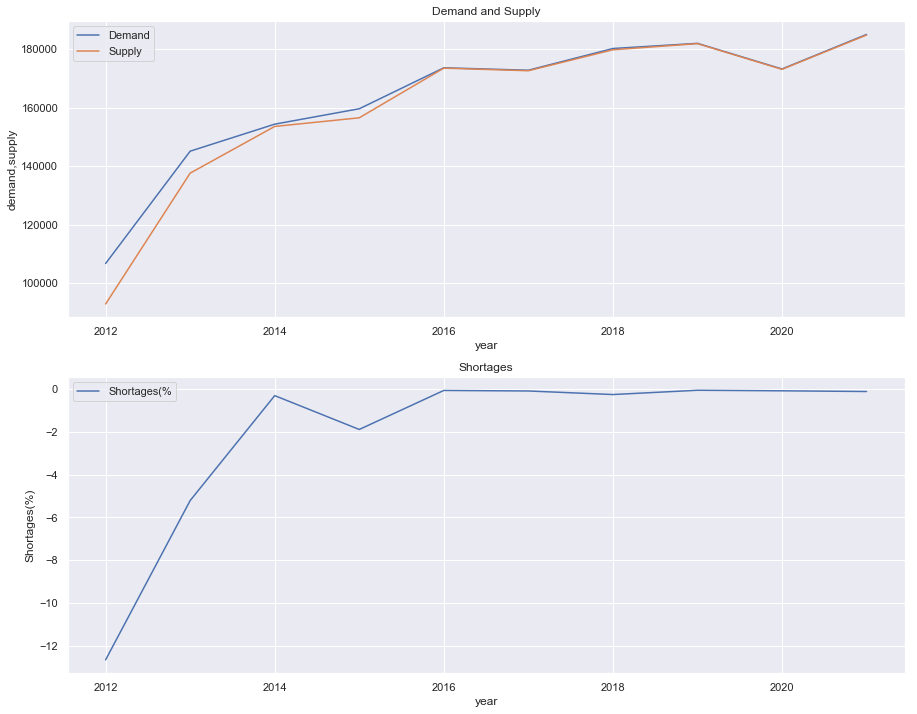

In [24]:
fig, (ax1, ax2) = plt.subplots(nrows=2,ncols=1,figsize=(15,12))
data1 = demand_supply_yearly.iloc[0:-1, : ][['Requirement(MW)','Peak_Demand_Met5(MW)']]
data2 = demand_supply_yearly.iloc[0:-1, : ][['%Shortage(MW)']]

ax1.plot(data1['Requirement(MW)'], label='Demand')
ax1.plot(data1['Peak_Demand_Met5(MW)'], label='Supply')
ax1.set_title('Demand and Supply')
ax1.set_xlabel('year')
ax1.set_ylabel('demand,supply')

ax2.plot(data2, label='Shortages(%')
ax2.set_title('Shortages')
ax2.set_xlabel('year')
ax2.set_ylabel('Shortages(%)')

ax1.legend()
ax2.legend()
plt.plot()

### MONTHLY DATASET OF ENERGY DEMAND AND SUPPLY

In [25]:
# Coverting year_month to period and makin it our dataframe index
demand_supply_monthly['year_month'] = pd.to_datetime(demand_supply_monthly['year_month']).dt.to_period('M')
demand_supply_monthly = demand_supply_monthly.set_index('year_month')

In [26]:
# a view of the dataframe
demand_supply_monthly.head()

,Requirement(MU/DAY),Energy_met(MU/DAY),Surplus(+)/Deficit(-)(MU/DAY),Requirement(MU),Energy_met(MU),Surplus(+)/Deficit(-)(MU),%Shortage(MU),Requirement(MW),Peak_Demand_Met5(MW),Surplus(+)/Deficit(-)(MW),%Shortage(MW),name_report,date_published,month_published,year_published
year_month,,,,,,,,,,,,,,,
2022-04,354.0,354.0,-0.9,10632.0,10605.0,-26.0,-0.2,17646.0,17563.0,-83.0,-0.5,Monthly_Report_Apr_2022,2022-05-23,5,2022
2022-05,337.0,337.0,0.0,10459.0,10458.0,-1.0,0.0,16906.0,16906.0,0.0,0.0,Monthly_Report_May_2022,2022-06-23,6,2022
2022-03,344.0,343.0,-0.3,10657.0,10648.0,-9.0,-0.1,17196.0,17196.0,0.0,0.0,Monthly_Report_Mar_2022,2022-04-25,4,2022
2022-01,286.0,286.0,0.0,8873.0,8873.0,1.0,0.0,15290.0,15290.0,0.0,0.0,Monthly_Report_Jan_2022,2022-02-23,2,2022
2021-11,245.0,245.0,0.0,7362.0,7360.0,-1.0,0.0,13501.0,13480.0,-21.0,-0.2,Monthly_Report_Nov_2021,2021-12-23,12,2021


In [27]:
# Sumaries statistics
demand_supply_monthly.describe()

,Requirement(MU/DAY),Energy_met(MU/DAY),Surplus(+)/Deficit(-)(MU/DAY),Requirement(MU),Energy_met(MU),Surplus(+)/Deficit(-)(MU),%Shortage(MU),Requirement(MW),Peak_Demand_Met5(MW),Surplus(+)/Deficit(-)(MW),%Shortage(MW),month_published,year_published
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,283.758197,276.782787,-6.989344,8631.884426,8419.755738,-212.110656,-2.718033,14066.011475,13849.101639,-216.893443,-1.734426,6.598361,2017.131148
std,27.948258,36.694300,14.425527,864.073361,1127.604563,438.266568,5.696266,1470.967073,1771.175005,583.523308,4.757991,3.271868,2.721056
min,217.000000,177.000000,-60.000000,6511.100000,5302.000000,-1860.000000,-24.000000,10161.000000,8518.000000,-3745.000000,-28.000000,1.000000,2013.000000
25%,264.500000,254.000000,-7.000000,7994.750000,7759.750000,-216.525000,-2.825000,12969.000000,12732.000000,-161.250000,-1.250000,4.000000,2014.000000
50%,280.500000,279.050000,-0.200000,8534.100000,8431.000000,-5.450000,-0.100000,14290.500000,14225.500000,-23.000000,-0.200000,7.000000,2017.000000
75%,302.875000,302.800000,0.000000,9201.150000,9201.650000,-0.750000,0.000000,15024.500000,15007.250000,0.000000,0.000000,9.000000,2019.000000
max,354.000000,354.000000,0.100000,10657.000000,10648.000000,3.000000,0.000000,17646.000000,17563.000000,2360.000000,20.700000,12.000000,2022.000000


### Q1: Is there a month where the supply in MW was up to or more than the demand? (Ans: The supply of energy was enough 45% of the time(56 months out of 122 months) during the period of study)

### In 2012 and 2013 the supply of energy was lower than the demand for each month of the year.

In [28]:
sufficient_months = demand_supply_monthly[demand_supply_monthly['%Shortage(MW)']>=0].index
print(sufficient_months)
sufficient_months_percent = sufficient_months.size/demand_supply_monthly.shape[0]
print(sufficient_months_percent)

PeriodIndex(['2022-05', '2022-03', '2022-01', '2021-07', '2021-05', '2022-02',
             '2021-12', '2021-08', '2021-06', '2021-04', '2021-03', '2021-01',
             '2020-11', '2020-09', '2020-07', '2020-05', '2021-02', '2020-12',
             '2020-10', '2020-08', '2020-03', '2020-02', '2019-12', '2019-10',
             '2019-08', '2019-04', '2020-01', '2019-11', '2019-09', '2019-07',
             '2019-03', '2017-11', '2017-09', '2017-07', '2018-02', '2017-12',
             '2017-08', '2017-04', '2017-10', '2017-01', '2016-12', '2016-11',
             '2016-10', '2016-08', '2016-06', '2016-04', '2016-02', '2015-10',
             '2015-06', '2016-01', '2015-11', '2015-12', '2014-11', '2014-09',
             '2014-07', '2019-02'],
            dtype='period[M]', name='year_month', freq='M')
0.45901639344262296


### Q2: for each year, which month corresponds to the biggest deficit? (Ans: The level of monthly highest deficit rate is reducing with time and is contantly less than 1% since end of 2015. April, May, June and July are the most represented.

 2022 : The maximum deficit of -0.50% for the monthly requirement in Energy for Tamil Nadu state was recorded in 2022-04
 2021 : The maximum deficit of -0.90% for the monthly requirement in Energy for Tamil Nadu state was recorded in 2021-09
 2020 : The maximum deficit of -0.70% for the monthly requirement in Energy for Tamil Nadu state was recorded in 2020-04
 2019 : The maximum deficit of -0.40% for the monthly requirement in Energy for Tamil Nadu state was recorded in 2019-05
 2018 : The maximum deficit of -0.50% for the monthly requirement in Energy for Tamil Nadu state was recorded in 2018-07
 2018 : The maximum deficit of -0.50% for the monthly requirement in Energy for Tamil Nadu state was recorded in 2018-05
 2017 : The maximum deficit of -0.40% for the monthly requirement in Energy for Tamil Nadu state was recorded in 2017-06
 2016 : The maximum deficit of -0.30% for the monthly requirement in Energy for Tamil Nadu state was recorded in 2016-07
 2015 : The maximum deficit of -

c:\Users\user\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\Users\user\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\Users\user\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


[]

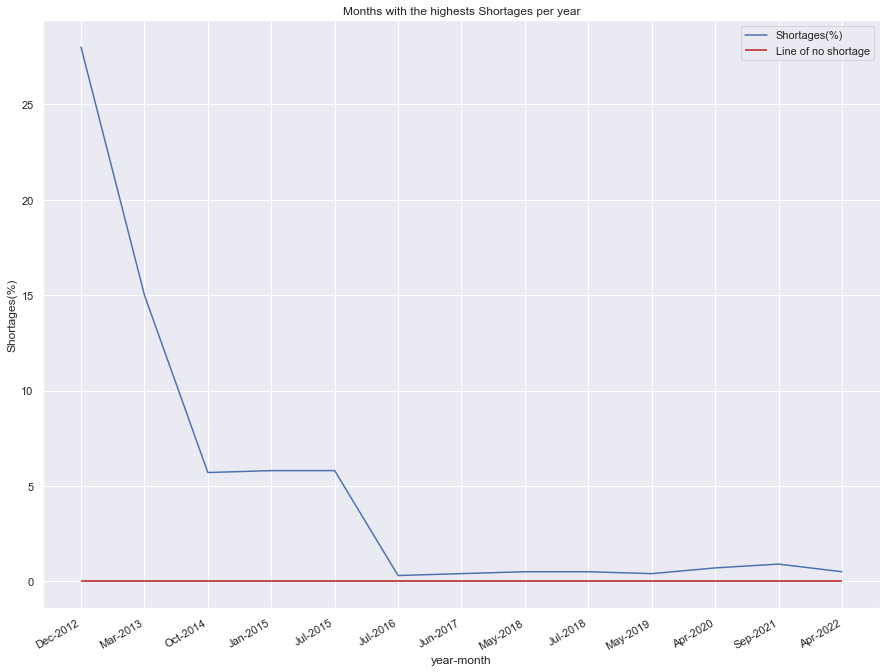

In [29]:
unique_year = demand_supply_monthly.index.year.unique()
maximum_deficits_ = []
maximum_deficit_months = []
for y in unique_year:
    is_y = demand_supply_monthly.index.year == y
    maximum_deficit_ = demand_supply_monthly[is_y]['%Shortage(MW)'].min()
    maximum_deficit_month = demand_supply_monthly[is_y][demand_supply_monthly[is_y]['%Shortage(MW)'] == maximum_deficit_].index
    for i in range(len(maximum_deficit_month)):
        maximum_deficits_.append(-maximum_deficit_)
        maximum_deficit_months.append(maximum_deficit_month[i])
        print(f' {y} : The maximum deficit of {maximum_deficit_:.2f}% for the monthly requirement in Energy for Tamil Nadu state was recorded in {maximum_deficit_month[i]}')

df_deficits = pd.DataFrame({'year_month':maximum_deficit_months,'Shortages(MW)%':maximum_deficits_})

# sort the index by ascending order for a good representation
df_deficits = df_deficits.sort_values(by='year_month', ascending=True)
#df_deficits['year_month'] = df_deficits['year_month'].apply(lambda x: dt.datetime.strptime(x.strftime('%b-%Y'), '%b-%Y'))

# Change the format of the time index
df_deficits.index = df_deficits.year_month.apply(lambda x: x.strftime('%b-%Y'))

fig, ax3 = plt.subplots(figsize=(15,12))

# Rotate and align the tick labels so they look better.
fig.autofmt_xdate()
ax3.plot(df_deficits.index,df_deficits['Shortages(MW)%'], label='Shortages(%)')
ax3.set_title('Months with the highests Shortages per year')
ax3.set_xlabel('year-month')
ax3.set_ylabel('Shortages(%)')
ax3.hlines(y=0, xmin='Dec-2012', xmax='Apr-2022', linewidth=2, color='r', label='Line of no shortage')

ax3.legend()
plt.plot()

### Q3: What are the maximum and minimum Energy supplied in the period and when was that? (Ans: max supplied: 17563 MW in april 2022, min supplied: 8518 MW in november 2012)

In [30]:
max_monthly_supplied_MW = demand_supply_monthly['Peak_Demand_Met5(MW)'].max()
max_monthly_supplied_MW_month = demand_supply_monthly.index[demand_supply_monthly['Peak_Demand_Met5(MW)'] == max_monthly_supplied_MW]
f'The maximum level of energy supplied in the period is {max_monthly_supplied_MW} MW in {max_monthly_supplied_MW_month[0]}'

'The maximum level of energy supplied in the period is 17563.0 MW in 2022-04'

In [31]:
min_monthly_supplied_MW = demand_supply_monthly['Peak_Demand_Met5(MW)'].min()
min_monthly_supplied_MW_month = demand_supply_monthly.index[demand_supply_monthly['Peak_Demand_Met5(MW)'] == min_monthly_supplied_MW]
f'The minimum level of energy supplied in the period is {min_monthly_supplied_MW} MW in {min_monthly_supplied_MW_month[0]}'

'The minimum level of energy supplied in the period is 8518.0 MW in 2012-11'

### Q4 demand and supply trends (Obs: The difference between demand and supply per month is getting smaller with time enven if in general demand is above supply)
### percentage of shortages in MW - trend (Obs: The shortages rate per month are reducing to zero as we move from 2012 to 2022)

[]

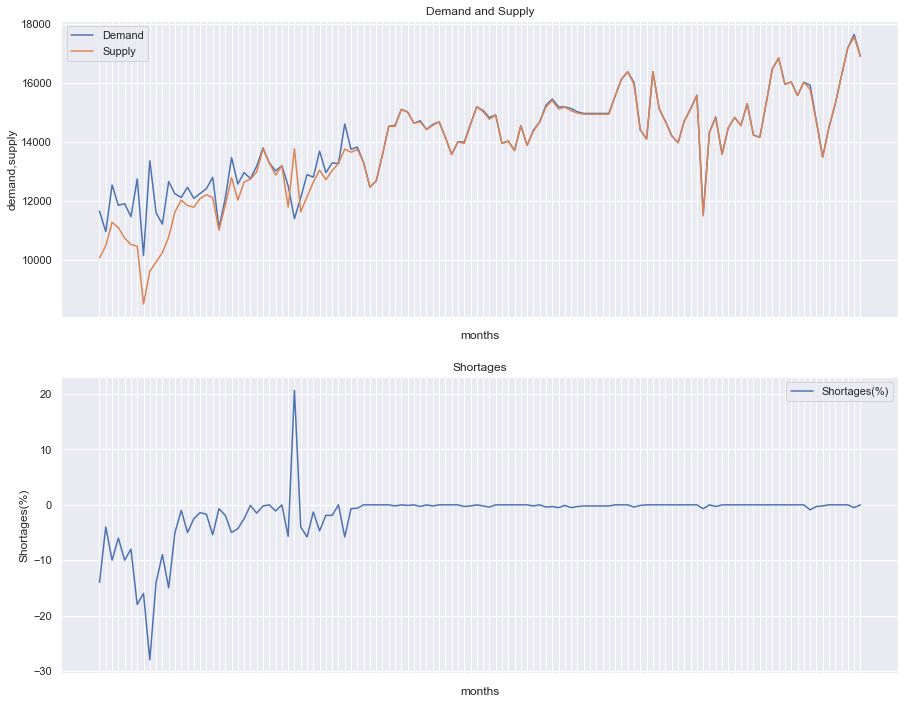

In [35]:
data = demand_supply_monthly.copy()
data = data.reset_index()

# sort the year_month column by ascending order for a good representation
data = data.sort_values(by='year_month', ascending=True)
#data.index = [f'm + {i}' for i in range(0,data.shape[0])]

# Change the format of the time index
data.index = data.year_month.apply(lambda x: x.strftime('%b-%y'))
#data.index = data.year_month


fig, (ax1, ax2) = plt.subplots(nrows=2,ncols=1,figsize=(15,12))

data3 = data[['Requirement(MW)','Peak_Demand_Met5(MW)']]
data4 = data[['%Shortage(MW)']]

ax1.axes.xaxis.set_ticklabels([])
ax1.plot(data3['Requirement(MW)'], label='Demand')
ax1.plot(data3['Peak_Demand_Met5(MW)'], label='Supply')
ax1.set_title('Demand and Supply')
ax1.set_xlabel('months')
ax1.set_ylabel('demand,supply')
    
ax2.axes.xaxis.set_ticklabels([])
ax2.plot(data4, label='Shortages(%)')
ax2.set_title('Shortages')
ax2.set_xlabel('months')
ax2.set_ylabel('Shortages(%)')

ax1.legend()
ax2.legend()
plt.plot()